# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Mover-P1-y-P4" data-toc-modified-id="Mover-P1-y-P4-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Mover P1 y P4</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los retardadores

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   14/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.


After this formalism, we pass to Mueller using Jones-Mueller Transformation

**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2

1. Se deja R2 en un ángulo fija.

1. Se hace un doble bucle for para P1 y P4.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de R2.
1. Parámetros de R2



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

## Tarjeta de adquisición de datos

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Motores

In [5]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]


In [6]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



In [7]:
# Intensidad con motores a 0
motors.get_position()

ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)

current positions = ([ 0.], [-0.], [-0.], [ 0.])
0.768765540095


## Mover P1 y P4

In [8]:
# Move motor 1 to maximum position of laser diode
Vels=[150,150,150,150]

motors.move(
        positions=[0, 0, 0, 0], velocities=Vels, kind='polarizer', verbose=False)
motors.get_position()
get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True);

current positions = ([ 2.795], [-0.], [-0.], [ 161.889])
0.7892, 

In [9]:
angle_1=sp.linspace(0,180,11)
angle_4=sp.linspace(0,180,15)
Angle_1, Angle_4 = sp.meshgrid(angle_1, angle_4)
intensities=sp.zeros_like(Angle_1,dtype=float)
print( intensities.shape)

(15L, 11L)


In [10]:
for i1, a1 in enumerate(angle_1):
    print('\n {:2}/{}: '.format(i1, len(angle_1)), end='' )
    for i4, a4 in enumerate(angle_4):
        motors.move(
            positions=[a1, 0, 0, a4], velocities=Vels,  kind='polarizer', verbose=False)
        intensities[i4, i1]=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)


  0/11: 0.7892, 0.8097, 0.8097, 0.7892, 0.7636, 0.7227, 0.6818, 0.6511, 0.6357, 0.6357, 0.6511, 0.6818, 0.7176, 0.7585, 0.7892, 
  1/11: 0.7943, 0.9734, 1.1065, 1.1576, 1.1269, 1.0144, 0.8455, 0.6460, 0.4669, 0.3287, 0.2827, 0.3134, 0.4259, 0.5999, 0.7943, 
  2/11: 0.7688, 1.0400, 1.2549, 1.3623, 1.3367, 1.1986, 0.9581, 0.6767, 0.3952, 0.1906, 0.0780, 0.1036, 0.2468, 0.4873, 0.7739, 
  3/11: 0.7176, 0.9837, 1.1986, 1.3163, 1.3214, 1.1986, 0.9837, 0.7176, 0.4566, 0.2417, 0.1292, 0.1240, 0.2417, 0.4618, 0.7278, 
  4/11: 0.6767, 0.8302, 0.9581, 1.0451, 1.0707, 1.0195, 0.9172, 0.7739, 0.6204, 0.4873, 0.4004, 0.3799, 0.4311, 0.5385, 0.6767, 
  5/11: 0.6408, 0.6255, 0.6204, 0.6511, 0.6869, 0.7278, 0.7739, 0.8046, 0.8251, 0.8251, 0.7995, 0.7636, 0.7176, 0.6767, 0.6408, 
  6/11: 0.6357, 0.4618, 0.3287, 0.2775, 0.3134, 0.4413, 0.6101, 0.8097, 0.9939, 1.1218, 1.1730, 1.1321, 1.0093, 0.8353, 0.6408, 
  7/11: 0.6613, 0.3901, 0.1854, 0.0780, 0.1087, 0.2571, 0.5027, 0.7892, 1.0655, 1.2753, 1.3777, 

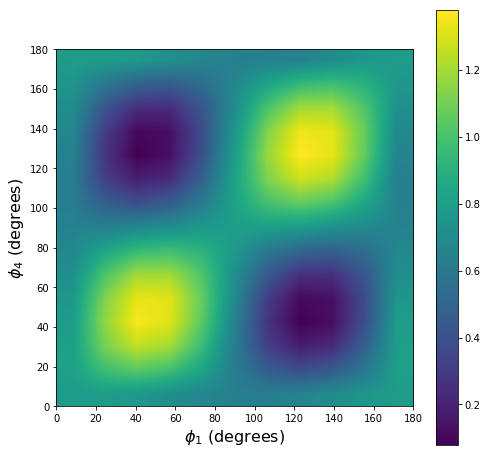

In [11]:
filename="step5_parametros_R2b_{}".format(datetime.date.today())


plt.figure(figsize=(8,8))
plt.imshow(intensities,
            interpolation='bilinear',
                      aspect='auto',
            origin='lower',extent=[angle_1[0], angle_1[-1], angle_4[0], angle_4[-1]])
plt.xlabel('$\phi_1$ (degrees)', fontsize=16)
plt.ylabel('$\phi_4$ (degrees)', fontsize=16)
plt.axis('scaled')
plt.colorbar(orientation='vertical')
plt.savefig(filename+'.pdf')

In [12]:
data=dict(angle_1=angle_1, angle_4=angle_4, intensities=intensities)
data2=np.zeros((len(angle_4),len(angle_1), 3),dtype=float)
data2[:,:,0]=Angle_1
data2[:,:,1]=Angle_4
data2[:,:,2]=intensities
np.save(filename+'.npy', data2)
savemat(filename+'.mat', data, oned_as='row')

## Final

In [13]:
motors.close()
del motors
LabJackPython.Close()